In [1]:
import pandas as pd
import numpy as np
import os
import time
import requests
import json
import csv
from tqdm import tqdm
import tweepy
import requests
import pandas as pd
import os
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df_g1=pd.read_csv('./data_cleaned/Retail and Wholesale.csv')
df_g1.head()

,year,Total_retail(USD in billion),E-commerce_retail(USD in billion),retail_percentage(%),Total_wholesale(USD in billion),E-commerce_wholesale(USD in billion),Wholesale_percentage(%)
0,2006,3871.57,113.33,2.927236,1723.378,635.596,36.880824
1,2007,3995.18,136.47,3.415866,1765.972,667.095,37.774948
2,2008,3935.32,141.59,3.597929,1775.259,675.168,38.032084
3,2009,3612.47,145.51,4.027992,1528.696,621.967,40.686114
4,2010,3818.05,169.92,4.450439,1723.882,733.053,42.523386


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(x, labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()

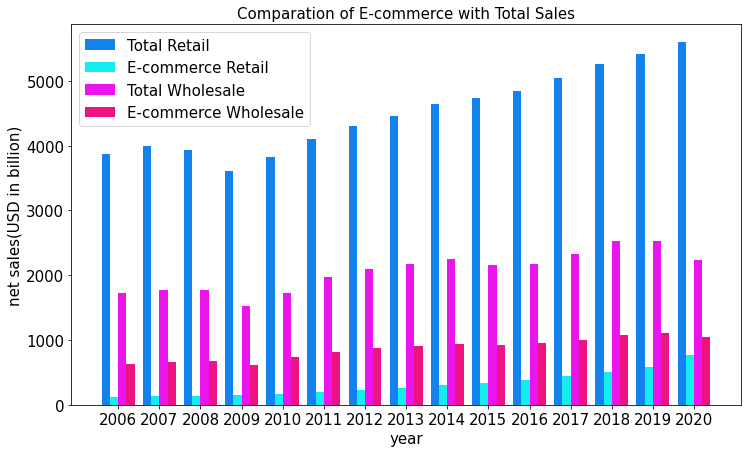

In [96]:
FS=15
width = 0.2

y1=df_g1['Total_retail(USD in billion)']
y2=df_g1['E-commerce_retail(USD in billion)']
y3=df_g1['Total_wholesale(USD in billion)']
y4=df_g1['E-commerce_wholesale(USD in billion)']
x=df_g1['year']

fig,ax=plt.subplots(figsize=(12,7))
ax.bar(x-width*3/2,y1,width,color='#1482ED',label='Total Retail')
ax.bar(x-width/2,y2,width,color='#14EDEB',label='E-commerce Retail')
ax.bar(x+width/2,y3,width,color='#EB14ED',label='Total Wholesale')
ax.bar(x+width*3/2,y4,width,color='#ED1482',label='E-commerce Wholesale')

# rects1 =ax.bar(x-width*3/2,y1,width,color='#1482ED',label='Total Retail')
# rects2 =ax.bar(x-width/2,y2,width,color='#14EDEB',label='E-commerce Retail')
# rects3 =ax.bar(x+width/2,y3,width,color='#EB14ED',label='Total Wholesale')
# rects4 =ax.bar(x+width*3/2,y4,width,color='#ED1482',label='E-commerce Wholesale')
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)

ax.set_ylabel('net sales(USD in billion)',fontsize=FS)
ax.set_xlabel('year',fontsize=FS)
ax.set_title('Comparation of E-commerce with Total Sales',fontsize=FS)
ax.set_xticks(df_g1['year'])
ax.tick_params(axis='both',which='major',labelsize=FS)
ax.legend(fontsize=FS)
plt.show()


In [3]:
df_wordcloud=pd.read_csv('./data_cleaned/tw online store.csv')

In [21]:
df_wordcloud.columns
# test for punctuations only using the first three rows in the column cleaned_text as example
test_punc=df_wordcloud['cleaned_text'].head(3)
test_punc_join=' '.join([test_punc[i] for i in range(len(test_punc))])
for i in test_punc_join.split():
    if i in string.punctuation :
        print('exist')
        break

In [4]:
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud)
        # No axis details
        plt.axis("off")
    # Generate word cloud
    wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state=1,
    background_color='salmon',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

In [9]:
df_wordcloud['cleaned_text']

0     latest update Elastic includes Beat holiday ru...
1     Aussie small business wins international onlin...
2     CassandrusB Were seeing fans turn leaf unis tu...
3     StoreBrands Nick Green cofounder thrivemarket ...
4     Appbased online lottery ticket resellers permi...
                            ...                        
95    TakeMeLeics Online Shopping voucher YOUR choic...
96    OberoiMall Wrong Cococart Oberoi retailer want...
97    Congratulations Ellementry being recognized br...
98    topshipafrica Meet Ozinna Anumudu founder http...
99    httpstcozorFCEkXK Global Online Money httpstco...
Name: cleaned_text, Length: 100, dtype: object

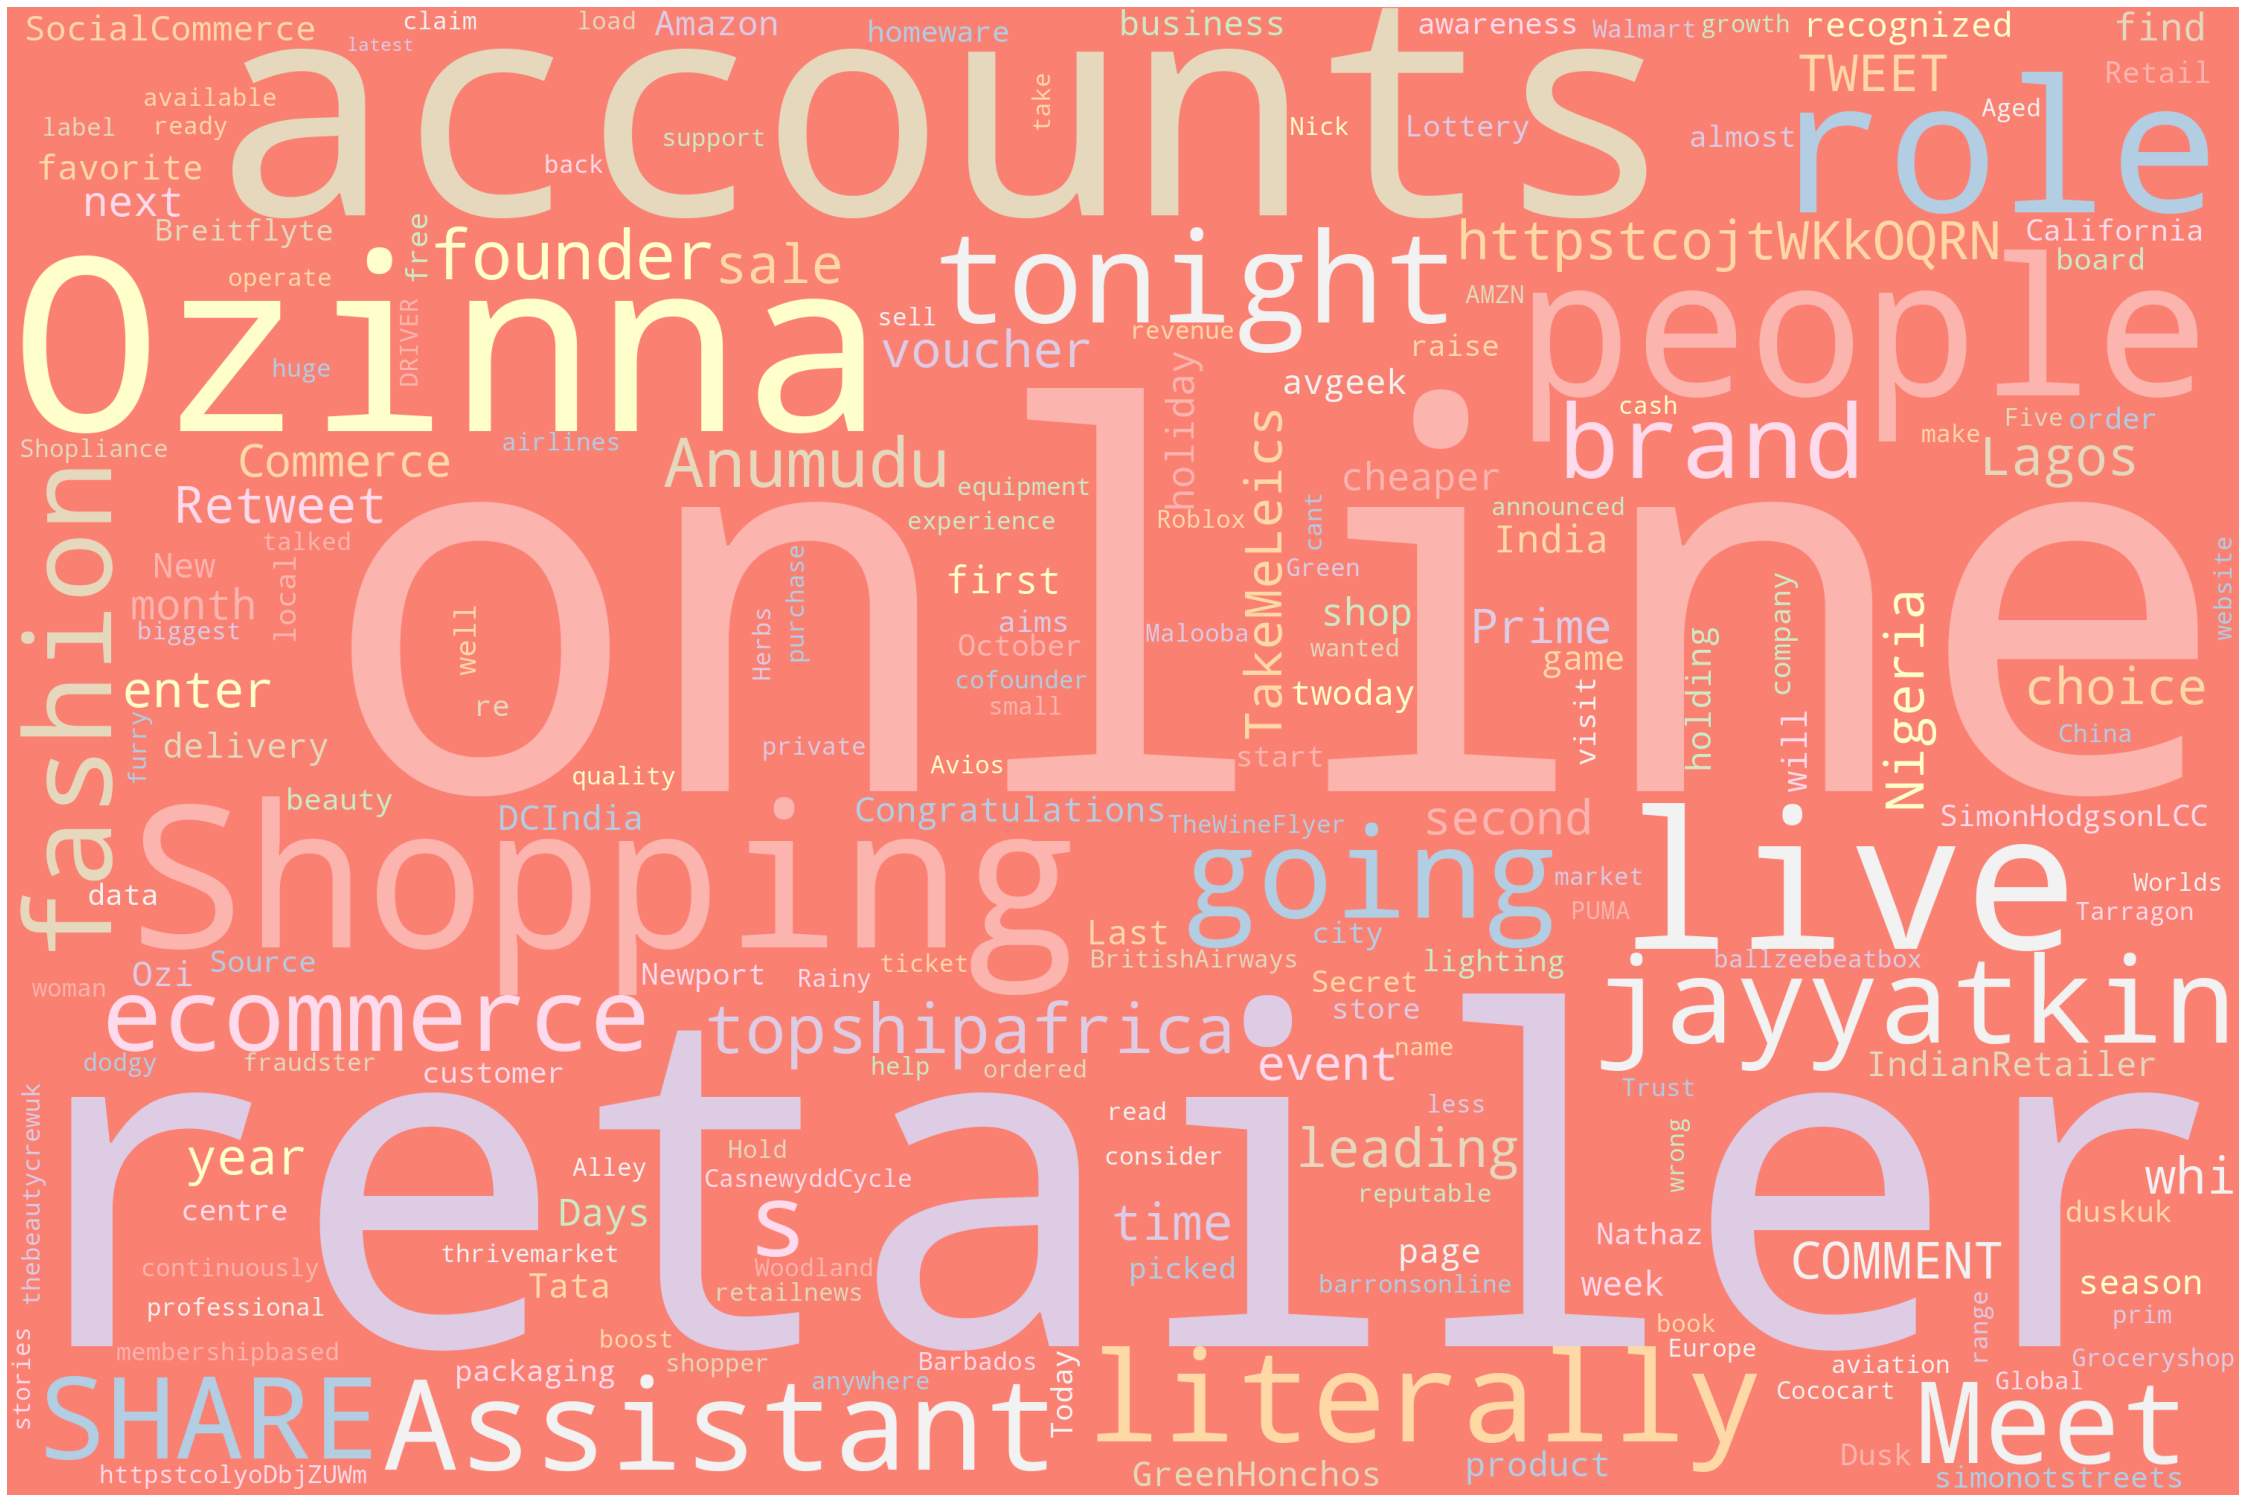

In [12]:
text= ' '.join([df_wordcloud['cleaned_text'][i] for i in range(len(df_wordcloud['cleaned_text']))])
wordcloud=generate_word_cloud(text)


In [106]:
df_segments=pd.read_csv('./data_cleaned/online stores different segments.csv')
df_segments

,online stores: net sales,electronic(in million USD),Fashion(in million USD),Food&Bevarges(in million USD),Personal_Care(in million USD),Furniture & Appliances(in million USD)
0,amazon.com,38073.0,5598.0,2643.0,3374.0,15747.0
1,walmart.com,5345.0,5317.0,3289.0,3700.0,9867.0
2,target.com,1379.0,1857.0,811.0,1558.0,3245.0


In [132]:
df_segments[df_segments.iloc[:,0]=='amazon.com'].iloc[0,1:]

electronic(in million USD)                38073.0
Fashion(in million USD)                    5598.0
Food&Bevarges(in million USD)              2643.0
Personal_Care(in million USD)              3374.0
Furniture & Appliances(in million USD)    15747.0
Name: 0, dtype: object

In [169]:
[df_segments.columns.tolist()[1:][i].split('(')[0] for i in range(len(df_segments.columns.tolist()[1:]))]

['electronic',
 'Fashion',
 'Food&Bevarges',
 'Personal_Care',
 'Furniture & Appliances']

Text(0.5, 1.0, 'online website net sales by segment in USD in million')

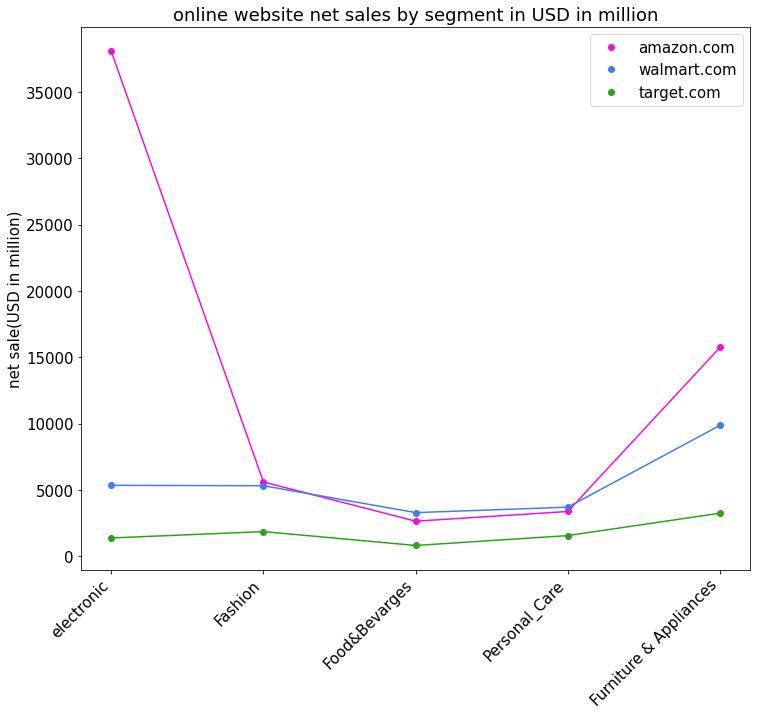

In [171]:
FS=15
xlist=[1,2,3,4,5]
ylist=df_segments[df_segments.iloc[:,0]=='amazon.com'].iloc[0,1:]
x_name=[df_segments.columns.tolist()[1:][i].split('(')[0] for i in range(len(df_segments.columns.tolist()[1:]))]
fig,ax=plt.subplots(figsize=(12,10))
ax.plot(xlist,ylist,'o',color='#ED14D9',label='amazon.com')
ax.plot(xlist,df_segments[df_segments.iloc[:,0]=='walmart.com'].iloc[0,1:],'o',color='#447AEE',label='walmart.com')
ax.plot(xlist,df_segments[df_segments.iloc[:,0]=='target.com'].iloc[0,1:],'o',color='#2EA21C',label='target.com')
ax.plot(xlist,ylist,color='#ED14D9')
ax.plot(xlist,df_segments[df_segments.iloc[:,0]=='walmart.com'].iloc[0,1:],color='#447AEE')
ax.plot(xlist,df_segments[df_segments.iloc[:,0]=='target.com'].iloc[0,1:],color='#2EA21C')

ax.legend(fontsize=FS)
ax.set_xticks(xlist)
ax.set_xticklabels(x_name, rotation=45, ha='right')
ax.tick_params(axis='both',which='major',labelsize=FS)
ax.set_ylabel('net sale(USD in million)',fontsize=FS)
ax.set_title('online website net sales by segment in USD in million',fontsize=FS+3)

In [5]:
df_rating=pd.read_csv('./data_cleaned/ratings for the different manufactures.csv')
df_rating.head()

,id,brand,manufacturer,reviews.rating,reviews.numHelpful,reviews.text,reviews.title,reviews.username
0,AVpf3txeLJeJML43FN82,Microsoft,Microsoft,5.0,0.0,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1
1,AVpf3txeLJeJML43FN82,Microsoft,Microsoft,4.0,0.0,It's thin and light. I can type pretty easily ...,Nice,Appa
2,AVpf3txeLJeJML43FN82,Microsoft,Microsoft,4.0,0.0,I love the new design the keys are spaced well...,New,Kman
3,AVpf3txeLJeJML43FN82,Microsoft,Microsoft,5.0,0.0,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY
4,AVpf3txeLJeJML43FN82,Microsoft,Microsoft,5.0,0.0,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster


In [6]:
df_rating['manufacturer'].value_counts()

Logitech     1604
Sony          496
Microsoft     495
JBL           357
Slingbox      342
iHome         154
Novatel       140
Name: manufacturer, dtype: int64

<AxesSubplot: xlabel='reviews.rating', ylabel='manufacturer'>

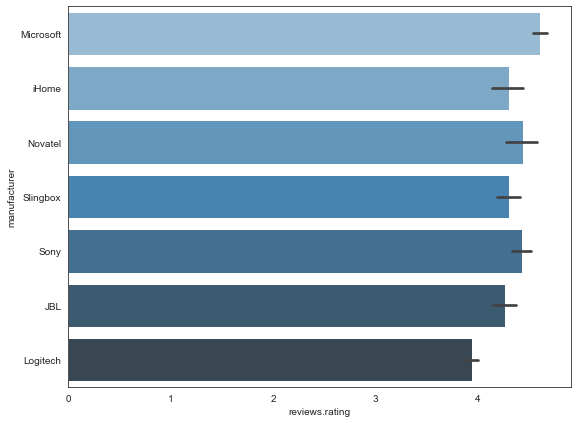

In [14]:
sns.set_style('white')
plt.figure(figsize=(9,7))
sns.barplot(x=df_rating['reviews.rating'], y=df_rating['manufacturer'],palette="Blues_d")

In [15]:
df_transaction=pd.read_csv('./data_cleaned/Electronic transactions of customers with different products.csv')

Text(0, 0.5, 'Item')

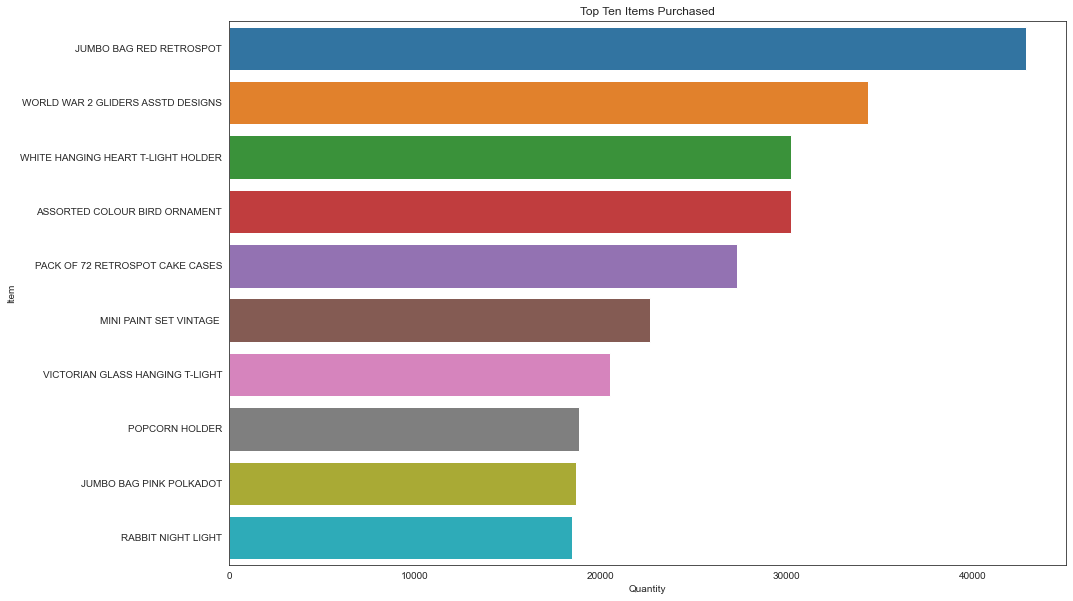

In [16]:
# Look at items purchase
df_item=df_transaction.groupby(["StockCode", "Description"])["Quantity"].sum().reset_index()
df_item=df_item.nlargest(10, "Quantity")
plt.figure(figsize=(15,10))
sns.barplot(x="Quantity", y="Description", data=df_item)
plt.title("Top Ten Items Purchased")
plt.xlabel("Quantity")
plt.ylabel("Item")